In [32]:
import pandas as pd

dataset = pd.read_csv('DoS_dataset.csv',parse_dates=[0])


dataset.head()


C:\Users\Imasha\AppData\Local\Temp\ipykernel_23020\1961192323.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1478198376.389427,0316,8,05,21,68,09,21,21,00,6f,R
1,1478198376.389636,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1478198376.389864,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1478198376.390096,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1478198376.390333,0329,8,40,bb,7f,14,11,20,00,14,R


In [1]:
"""import pandas as pd
import plotly.express as px
from sklearn.preprocessing import OneHotEncorder
from sklearn.datasets import fetch_openml




# Read the dataset from a CSV file
df = pd.read_csv('DoS_dataset.csv')

# Convert hexadecimal 'DATA' values to binary representation and split them into separate columns
for i in range(8):
    df[f'DATA_{i}'] = df[f'DATA[{i}]'].apply(lambda x: format(int(x, 16), '08b'))

# Concatenate the binary representation columns into a single column
df['Data'] = df[[f'DATA_{i}' for i in range(8)]].apply(lambda row: ''.join(row), axis=1)

# Convert the binary representation to integer
df['Data'] = df['Data'].apply(lambda x: int(x, 2))

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='Timestamp', y='Data', color='CAN ID', labels={'Timestamp': 'Timestamp', 'DATA': 'DATA', 'CAN ID': 'CAN ID'}, title='Data vs Timestamp with CAN IDs')
fig.update_coloraxes(colorscale='viridis')
fig.show()
"""

ImportError: cannot import name 'OneHotEncorder' from 'sklearn.preprocessing' (c:\Users\Imasha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\__init__.py)

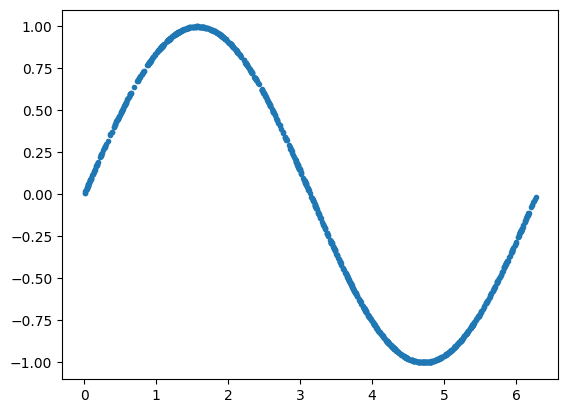

In [ ]:
import torch
from torch import nn
import math 
import matplotlib.pyplot as plt 

torch.manual_seed(111)
#11 initialize the random number generator 
# used to initialize the neural network's weight.


#training the data process 
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:,0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:, 0])
train_labels =torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range (train_data_length)]

plt.plot(train_data[:, 0], train_data[:,1],".")

In [2]:
#batch_size = 32
#train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle= True)


NameError: name 'torch' is not defined

In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('DoS_dataset.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Display the column names
print("Column names in the dataset:")
print(df.columns)


for column in df.columns:
    print(f"Unique values in the '{column}' column:")
    print(df[column].unique())
    print()

First few rows of the dataset:
      Timestamp  CAN ID   DLC  DATA[0]  DATA[1]  DATA[2]  DATA[3]  DATA[4]  \
0  1.478198e+09    0316     8       05       21       68       09       21   
1  1.478198e+09    018f     8       fe       5b       00       00       00   
2  1.478198e+09    0260     8       19       21       22       30       08   
3  1.478198e+09    02a0     8       64       00       9a       1d       97   
4  1.478198e+09    0329     8       40       bb       7f       14       11   

   DATA[5]  DATA[6]  DATA[7]  Flag  
0       21       00       6f     R  
1       3c       00       00     R  
2       8e       6d       3a     R  
3       02       bd       00     R  
4       20       00       14     R  
Column names in the dataset:
Index(['Timestamp', ' CAN ID', ' DLC', ' DATA[0]', ' DATA[1]', ' DATA[2]',
       ' DATA[3]', ' DATA[4]', ' DATA[5]', ' DATA[6]', ' DATA[7]', ' Flag'],
      dtype='object')
Unique values in the 'Timestamp' column:
[1.47819838e+09 1.47819838e+09 1.4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
df = pd.read_csv('DoS_dataset.csv')

# Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Function to convert hex to decimal and handle errors
def hex_to_decimal(x):
    try:
        return int(x, 16) if isinstance(x, str) else x
    except ValueError:
        return None  # Or another appropriate value or handling

# Convert hexadecimal values to decimal
hex_columns = ['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
for column in hex_columns:
    df[column] = df[column].apply(hex_to_decimal)

# Display the first few rows of the dataframe after conversion
print("First few rows of the dataset after conversion:")
print(df.head())

# Assuming the label column is named correctly after inspection
label_column = 'Flag'  # Cleaned label column name

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()

# Identify categorical columns for one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != label_column]  # Exclude the label column

# Split the data into features and labels
X = df.drop(label_column, axis=1)  # Features
y = df[label_column]  # Labels

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X.columns if col not in categorical_columns]),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
# Replace 'attack_label' with the actual label for attack found from the unique values in the 'Flag' column
unique_labels = df[label_column].unique()
print(f"Unique labels in 'Flag' column: {unique_labels}")
pos_label = unique_labels[1]  # Assuming the second unique value represents an attack, adjust as necessary

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=pos_label, average='binary')
recall = recall_score(y_test, y_pred, pos_label=pos_label, average='binary')
f1 = f1_score(y_test, y_pred, pos_label=pos_label, average='binary')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Feature importance (optional)
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()  # Only for numerical features
if categorical_columns:
    feature_names = list(feature_names) + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


First few rows of the dataset after conversion:
      Timestamp CAN ID  DLC  DATA[0]  DATA[1]  DATA[2]  DATA[3]  DATA[4]  \
0  1.478198e+09   0316    8        5       33    104.0      9.0     33.0   
1  1.478198e+09   018f    8      254       91      0.0      0.0      0.0   
2  1.478198e+09   0260    8       25       33     34.0     48.0      8.0   
3  1.478198e+09   02a0    8      100        0    154.0     29.0    151.0   
4  1.478198e+09   0329    8       64      187    127.0     20.0     17.0   

   DATA[5]  DATA[6]  DATA[7] Flag  
0     33.0      0.0    111.0    R  
1     60.0      0.0      0.0    R  
2    142.0    109.0     58.0    R  
3      2.0    189.0      0.0    R  
4     32.0      0.0     20.0    R  
Missing values in the dataset:
Timestamp        0
CAN ID           0
DLC              0
DATA[0]          0
DATA[1]          0
DATA[2]      31188
DATA[3]      31188
DATA[4]      31188
DATA[5]      31188
DATA[6]      31188
DATA[7]      31188
Flag         31188
dtype: int64
Unique 